<a href="https://colab.research.google.com/github/mohitsshetty986/Movie-Recommendation-Systems/blob/master/Recomender_with_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Recommender System with the help of Correlation**

###We have built a basic recommendation system by suggesting movies that are most similar to a particular movie. This is not a very robust recommendation system, it just gives movies most similar to your movie choice.

In [2]:

import numpy as np
import pandas as pd

**Import the datasets**

In [1]:
from google.colab import files
uploaded=files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


In [3]:
movies_data=pd.read_csv('movies.csv')
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_data=pd.read_csv('ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,0,50,5.0,881250949
1,0,172,5.0,881250949
2,0,133,1.0,881250949
3,196,242,3.0,881250949
4,186,302,3.0,891717742


####**Merge both the dataframes** 

In [5]:
movie_ratings_combined=pd.merge(ratings_data,movies_data,on='movieId')
movie_ratings_combined

,userId,movieId,rating,timestamp,title,genres
0,0,50,5.0,881250949,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
1,290,50,5.0,880473582,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
2,79,50,4.0,891271545,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
3,2,50,5.0,888552084,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
4,8,50,5.0,879362124,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
1047249,10472,184393,5.0,1518426759,The Criminal Excellency Fund (2018),Action|Comedy|Crime
1047250,10494,124544,5.0,1461152006,Perfume (2001),Comedy|Drama
1047251,10518,66025,1.0,1233955153,Go Go Tales (2007),Comedy|Drama
1047252,10518,99906,3.0,1358520547,Renoir (2012),Drama|Romance


##**Lets visualize the data we have**

In [6]:
import matplotlib.pyplot as plot
import seaborn as sns
sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Lets get the average ratings for each movie which might be useful going forth**

In [7]:
movie_ratings_combined.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Bloodsport III (1996)                                                 5.0
The Beales of Grey Gardens (2006)                                     5.0
Chinese Ghost Story II, A (Sien nui yau wan II yan gaan do) (1990)    5.0
Red Hill (2010)                                                       5.0
Monkey's Mask, The (2000)                                             5.0
Name: rating, dtype: float64

**Calculating Number of ratings given for each movie is the key element here which will be used to filter out movies with good ratings but have only few number of voters who have voted.**

*A movie with 20 voters and 4 out of 5 average ratings must be preferred over a 
movie with 2 voters and 5 on 5 average ratings.*


---


We will perform filtering in later steps. For now let's focus what's more 
important i.e. combining ratings and no of ratings tables into one. 


---



In [8]:
movie_ratings_combined.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)             3530
Forrest Gump (1994)                          3355
Pulp Fiction (1994)                          3069
Silence of the Lambs, The (1991)             2937
Star Wars: Episode IV - A New Hope (1977)    2866
Name: rating, dtype: int64

In [9]:
ratings=pd.DataFrame(movie_ratings_combined.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.375
#Horror (2015),1.000
#realityhigh (2017),4.000
$ (Dollars) (1971),3.000
$5 a Day (2008),1.750


##**Create a ratings dataframe that will keep a log of movie ratings and number of ratings for all the movies**

In [10]:
ratings['Number of Ratings']=pd.DataFrame(movie_ratings_combined.groupby('title')['rating'].count())
ratings.head()

,rating,Number of Ratings
title,,
"""Great Performances"" Cats (1998)",2.375,8
#Horror (2015),1.000,1
#realityhigh (2017),4.000,1
$ (Dollars) (1971),3.000,1
$5 a Day (2008),1.750,2


**This is how our 'Number of Ratings' Distribution looks**

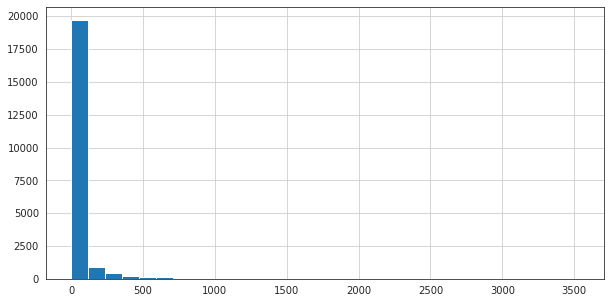

In [11]:
plot.figure(figsize=(10,5))
ratings['Number of Ratings'].hist(bins=30);

**We will get the ratings histogram.**

###What we find that most users have rated between 3 and 4 for the movies available in the dataset.

---

It follows a normal distribution curve

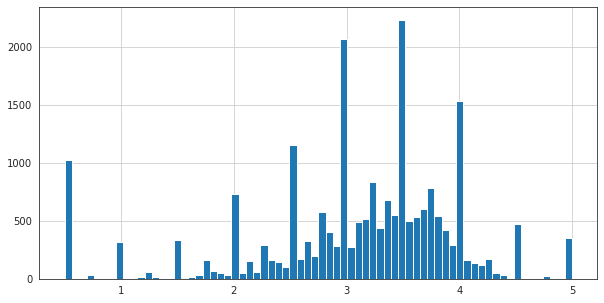

In [12]:
plot.figure(figsize=(10,5))
ratings['rating'].hist(bins=70);

###We can get a jointplot for our dataset which gives both the scatter plot as well as the histrogram 

**Notice that wherever the scatterplot area is dense there's the most 'Number of Ratings' given for the movies.**
Many movies have zero ratings as well.

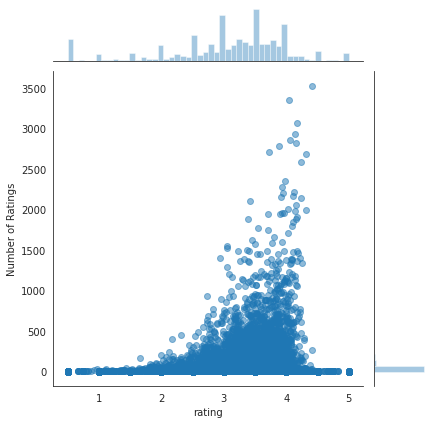

In [13]:
sns.jointplot(x='rating',y='Number of Ratings',data=ratings,alpha=0.5);

###**Let's create a matrix that has the user ids on Y-axis and the movie title on X-axis. The cell values will be the ratings of the movies(columns) given by the different users(rows) and there are many movies people have not rated/seen which are represented as NaN.**

In [14]:
movies_ratings_pivot=movie_ratings_combined.pivot_table(index='userId',columns='title',values='rating')
movies_ratings_pivot.head()

title,"""Great Performances"" Cats (1998)",#Horror (2015),#realityhigh (2017),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Pimpernel' Smith (1941),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(A)sexual (2011),(Dis)Honesty: The Truth About Lies (2015),(T)ERROR (2015),(Untitled) (2009),*batteries not included (1987),+1 (2013),...All the Marbles (1981),...And God Spoke (1993),...And Justice for All (1979),.45 (2006),1 (2014),1 Journée (2007),"1, 2, 3, Sun (Un, deuz, trois, soleil) (1993)",1-900 (06) (1994),1-Ichi (2003),10 (1979),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Questions for the Dalai Lama (2006),10 Rillington Place (1971),10 Rules for Sleeping Around (2013),...,Zoom (2006),Zoom (2015),Zootopia (2016),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),"Zorro, the Gay Blade (1981)",Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983),Zulu (1964),Zus & Zo (2001),Zygote (2017),[REC] (2007),[REC] 4: Apocalypse (2014),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eCupid (2011),eXistenZ (1999),iBoy (2017),iMurders (2008),iSteve (2013),loudQUIETloud: A Film About the Pixies (2006),unINDIAN (2015),xXx (2002),xXx: Return of Xander Cage (2017),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Üvegtigris (2001),Ουζερί Τσιτσάνης,Каникулы президента (2018),Мартынко (1987),Мафия (2016),Никто не знает про секс (2006),Обезьянки и грабители (1985),Он вам не Димон (2017),Оно (1990),Юленька (2009),Я худею (2018)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##We get the top most rated movies by :

In [15]:
ratings.sort_values('Number of Ratings',ascending=False).head(10)

,rating,Number of Ratings
title,,
"Shawshank Redemption, The (1994)",4.415722,3530
Forrest Gump (1994),4.036215,3355
Pulp Fiction (1994),4.166178,3069
"Silence of the Lambs, The (1991)",4.145557,2937
Star Wars: Episode IV - A New Hope (1977),4.058967,2866
"Matrix, The (1999)",4.157259,2817
Toy Story (1995),3.886731,2781
Jurassic Park (1993),3.726819,2707
"Usual Suspects, The (1995)",4.319351,2682


##Now let's get movie recommendations based on the movie of our choice in this case 'Forest Gump'.


---


You can get recommendations based on your choice by replacing 'Forrest Gump' with it.


---

**First we get the user ratings for Forrest Gump from 'movies_ratings_pivot' matrix we created**


In [16]:
forrestgump_user_ratings=movies_ratings_pivot['Forrest Gump (1994)']
forrestgump_user_ratings.head(10)

userId
0    NaN
1    NaN
2    NaN
3    NaN
4    3.0
5    NaN
6    NaN
7    4.0
8    NaN
9    NaN
Name: Forrest Gump (1994), dtype: float64

###Then we use **corrwith() method** to get correlations between movies based on their ratings present in the matrix.

**dataframe.corrwith() is used to compute pairwise correlation between rows or columns of two DataFrames.**

To understand more about correlation please check the [link](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/#:~:text=A%20correlation%20coefficient%20of%201,perfect%20correlation%20with%20foot%20length.&text=Zero%20means%20that%20for%20every,a%20positive%20or%20negative%20increase)


---



####With respect to 'forrestgump_user_ratings' we are going to correlate with the matrix data and then we are going to find out the correlation with respect to the userId.

In [17]:
similar_movies_forrestgump=movies_ratings_pivot.corrwith(forrestgump_user_ratings) 

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


###Convert the Series to Dataframe and drop the NaN values

In [18]:
correlation_forrestgump=pd.DataFrame(similar_movies_forrestgump,columns=['Correlation'])
correlation_forrestgump.dropna(inplace=True)
correlation_forrestgump.head(10)

,Correlation
title,
"""Great Performances"" Cats (1998)",-0.529489
$9.99 (2008),-1.000000
'71 (2014),-0.039074
'R Xmas (2001),-1.000000
'Round Midnight (1986),0.000000
'Salem's Lot (2004),-1.000000
'Til There Was You (1997),0.371873
"'burbs, The (1989)",0.191800
'night Mother (1986),-0.917680


### From above we see that we get the correlation for different movies with respect to 'Forrest Gump'. and if we sort the above dataframe by correlation, we should get the most similar movies on top.


---


**But this dataframe which we obtained below doesn't help much because there are a lot of movies only watched once by users who also watched Forest Gump.**

**So now we will have to filter out the movies with lower number of ratings**


---


Note: This will be performed after we visualize the sorted correlation data for movies in the below step

In [19]:
correlation_forrestgump.sort_values(by='Correlation', ascending=False).head(10)

,Correlation
title,
Мартынко (1987),1.0
Dirty Girl (2010),1.0
After the Fox (Caccia alla volpe) (1966),1.0
After Sex (2007),1.0
Chris Rock: Bigger & Blacker (1999),1.0
Tabu (2012),1.0
Don (2006),1.0
Hoodwinked Too! Hood vs. Evil (2011),1.0
"Verdict, The (1946)",1.0


**We get the number of ratings for movies in the correlation_forrestgump from the 'ratings' dataframe we had created in the earlier steps.**

In [20]:
correlation_forrestgump=correlation_forrestgump.join(ratings['Number of Ratings'])
correlation_forrestgump.head()

,Correlation,Number of Ratings
title,,
"""Great Performances"" Cats (1998)",-0.529489,8
$9.99 (2008),-1.000000,2
'71 (2014),-0.039074,21
'R Xmas (2001),-1.000000,2
'Round Midnight (1986),0.000000,4


**We use '100' as the threshold value for the 'Number of Ratings' to filter out the movies. '100' is chosen based on the histogram we observed earlier.**

## **And we have the final solution of movies similar to the movie Forest Gump.**

In [21]:
correlation_forrestgump[correlation_forrestgump['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Number of Ratings
title,,
Forrest Gump (1994),1.000000,3355
"Promise, The (Versprechen, Das) (1995)",0.699253,159
"Terminal, The (2004)",0.536054,330
Scent of a Woman (1992),0.514173,320
"Little Rascals, The (1994)",0.510212,171
Cinderella Man (2005),0.489629,189
From the Journals of Jean Seberg (1995),0.482771,111
Nico Icon (1995),0.476526,159
Amistad (1997),0.470109,195
